<a href="https://colab.research.google.com/github/couqdev/MachineLearning/blob/main/Project_ML_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ĐỀ TÀI GIỮA KÌ MÁY HỌC

1. Thành viên: 
+ Trần Đặng Quốc MSSV: 20130376
+ Nguyễn Minh Đức MSSV: 20130233


2. Dataset: Chess(king-rook vs, king)

3. Các thuật toán lựa thực hiện:
+ Neural network
+ SVM
+ kNN
+ Naïve Bayes
+ RandomForest
+ Decision Tree

4. Phân công việc:
+ Trần Đặng Quốc: Neural network, SVM, kNN.
+ Nguyễn Minh Đức: Naïve Bayes, RandomForest, Decision Tree.

1. Import Library

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MachineLeaning'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/MachineLeaning


In [11]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from keras.utils import to_categorical

2. Load dataset

In [12]:
dataset = pd.read_csv("datasetML.csv")
dataset

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win for White
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


Thông tin thuộc tính:

1. White King file - Vị trí cột quân Vua Trắng trên bàn cờ.
2. White King rank - Vị trí hàng quân Vua Trắng trên bàn cờ.
3. White Rook file - Vị trí cột quân Xe Trắng trên bàn cờ.
4. White Rook rank - Vị trí hàng quân Xe Trắng trên bàn cờ.
5. Black King file - Vị trí cột quân Vua Đen trên bàn cờ.
6. Black King rank - Vị trí hàng quân Vua Đen trên bàn cờ.
7. optimal depth-of-win for White - Thuộc tính này biểu diễn chiến thắng của quân Trắng dựa trên độ sâu tối ưu của nước đi, với giá trị từ {zero, one, two, ..., sixteen}, hoặc hòa(draw).

Kiểm tra missing:

In [ ]:
print(dataset.isnull().sum())

White King file                   0
White King rank                   0
White Rook file                   0
White Rook rank                   0
Black King file                   0
Black King rank                   0
optimal depth-of-win for White    0
dtype: int64


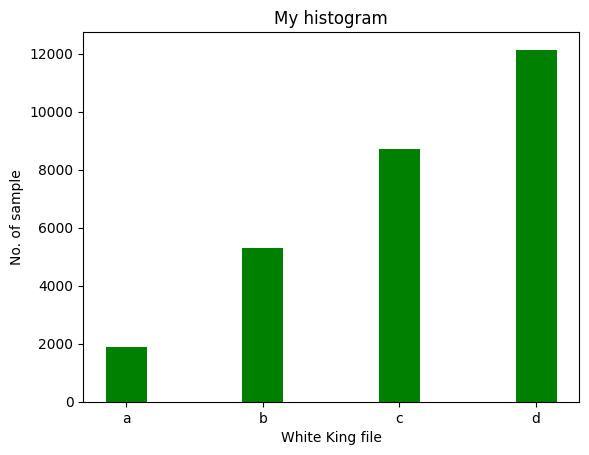

In [ ]:
# frequencies
data=dataset['White King file']
# setting the ranges and no. of intervals
range = (-0.5,3.5)
bins = 4
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.3)
# x-axis label
plt.xlabel('White King file')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

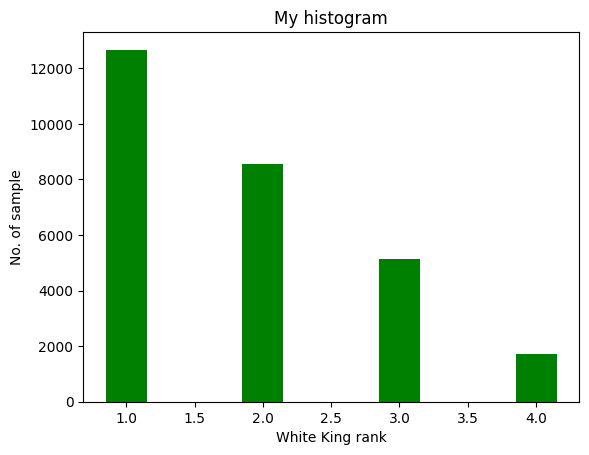

In [ ]:
# frequencies
data=dataset['White King rank']
# setting the ranges and no. of intervals
range = (0.5,4.5)
bins = 4
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.3)
# x-axis label
plt.xlabel('White King rank')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

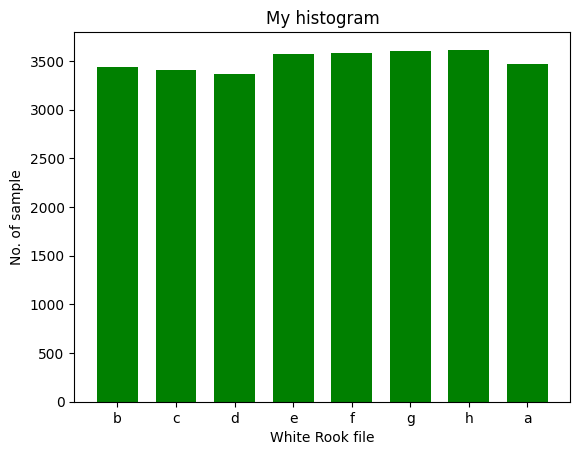

In [ ]:
# frequencies
data=dataset['White Rook file']
# setting the ranges and no. of intervals
range = (-0.5,7.5)
bins = 8
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.7)
# x-axis label
plt.xlabel('White Rook file')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

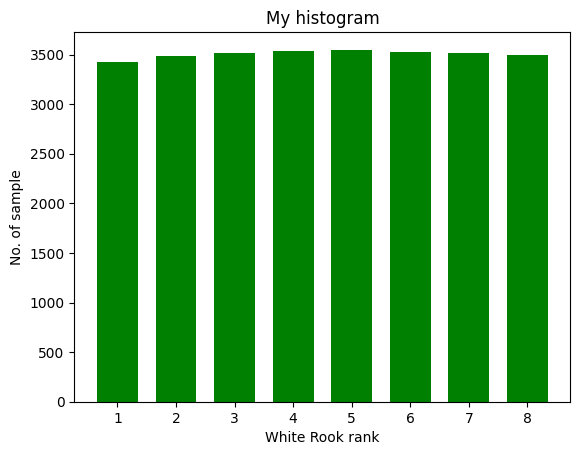

In [ ]:
# frequencies
data=dataset['White Rook rank']
# setting the ranges and no. of intervals
range = (0.5,8.5)
bins = 8
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.7)
# x-axis label
plt.xlabel('White Rook rank')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

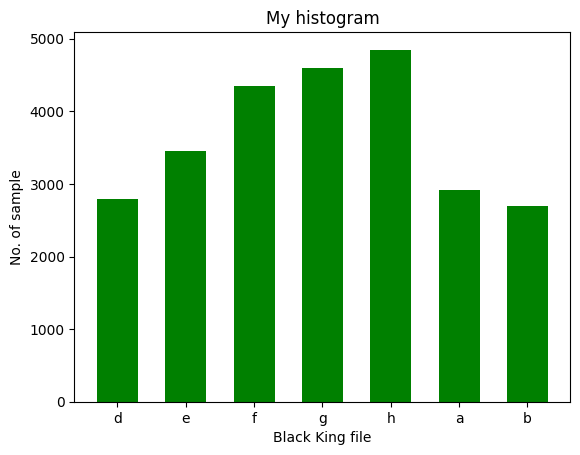

In [ ]:
# frequencies
data=dataset['Black King file']
# setting the ranges and no. of intervals
range = (0.5,7.5)
bins = 7
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.6)
# x-axis label
plt.xlabel('Black King file')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

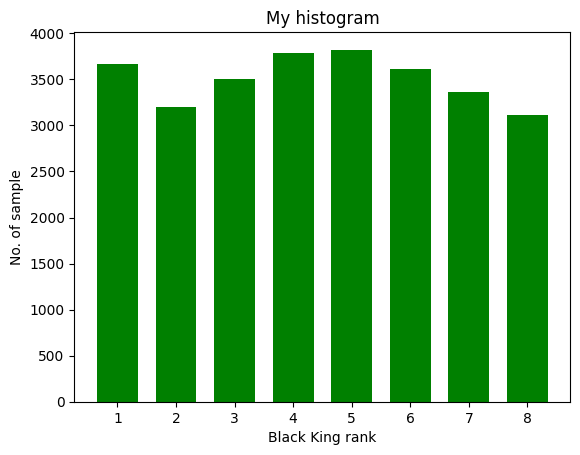

In [ ]:
# frequencies
data=dataset['Black King rank']
# setting the ranges and no. of intervals
range = (0.5,8.5)
bins = 8
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.7)
# x-axis label
plt.xlabel('Black King rank')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

In [ ]:
white_optimal_depths = dataset['optimal depth-of-win for White']
depth_counts = {}
for depth in white_optimal_depths:
    if depth not in depth_counts:
        depth_counts[depth] = 0
    depth_counts[depth] += 1
for depth, count in depth_counts.items():
    print(f'{depth}: {count}')


draw: 2796
zero: 27
one: 78
two: 246
three: 81
four: 198
five: 471
six: 592
seven: 683
eight: 1433
nine: 1712
ten: 1985
eleven: 2854
twelve: 3597
thirteen: 4194
fourteen: 4553
fifteen: 2166
sixteen: 390


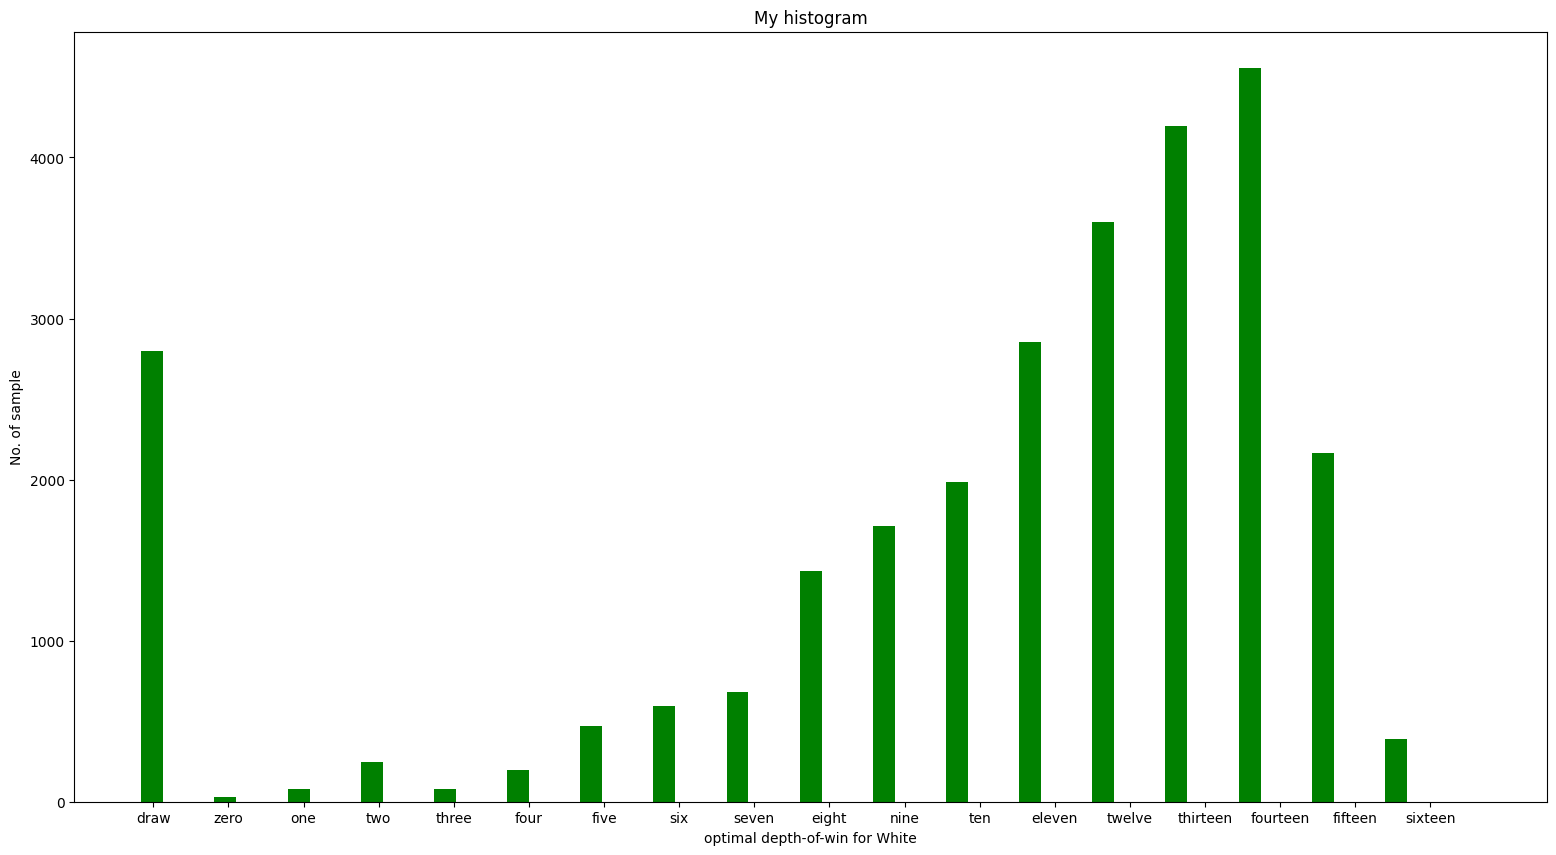

In [28]:
# frequencies
data=dataset['optimal depth-of-win for White']
# setting the ranges and no. of intervals
range = (-0.5,18)
bins = 19
plt.figure(figsize=(19, 10))
# plotting a histogram
plt.hist(data, bins, range, color='green', histtype='bar', rwidth=0.3)

# x-axis label
plt.xlabel('optimal depth-of-win for White')
# frequency label
plt.ylabel('No. of sample')
# plot title
plt.title('My histogram')
# function to show the plot
plt.show()

3. Tiền Xử lý dữ liệu:

OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['White King file', 'White Rook file', 'Black King file']

dataset3=[dataset['White King file'],dataset['White Rook file'],dataset['Black King file']]
df_encoded = pd.DataFrame(encoder.fit_transform(dataset[cat_cols]),columns=encoder.get_feature_names_out(cat_cols))
df_processed = pd.concat([dataset, df_encoded], axis=1)
df_processed.drop(columns=cat_cols, inplace=True)

y = df_processed['optimal depth-of-win for White']
X = df_processed.drop('optimal depth-of-win for White', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cân bằng dữ liệu bằng phương pháp Over-Spamling (dùng thuật toán SMOTE)

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print('Sau khi cân bằng %s' % Counter(y_resampled))

Sau khi cân bằng Counter({'draw': 4553, 'zero': 4553, 'one': 4553, 'two': 4553, 'three': 4553, 'four': 4553, 'five': 4553, 'six': 4553, 'seven': 4553, 'eight': 4553, 'nine': 4553, 'ten': 4553, 'eleven': 4553, 'twelve': 4553, 'thirteen': 4553, 'fourteen': 4553, 'fifteen': 4553, 'sixteen': 4553})


Chia dữ liệu: 70% cho train, 30% cho test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

4. Thuật toán SVM:

# 4.1 SVM Linear Kernel:

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accurary_linear =  metrics.accuracy_score(y_test, y_pred)
precision_linear = metrics.precision_score(y_test, y_pred, average='macro')
recall_linear = metrics.recall_score(y_test, y_pred, average='macro')
f1_linear = metrics.f1_score(y_test, y_pred, average='macro')

t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM Linear',round(accurary_linear, 3),round(precision_linear,3),round(recall_linear, 3),round(f1_linear,3)])
print(t)


+------------+----------+-----------+--------+-------+
|            | accuracy | precision | recall |   f1  |
+------------+----------+-----------+--------+-------+
| SVM Linear |  0.487   |   0.476   | 0.488  | 0.476 |
+------------+----------+-----------+--------+-------+


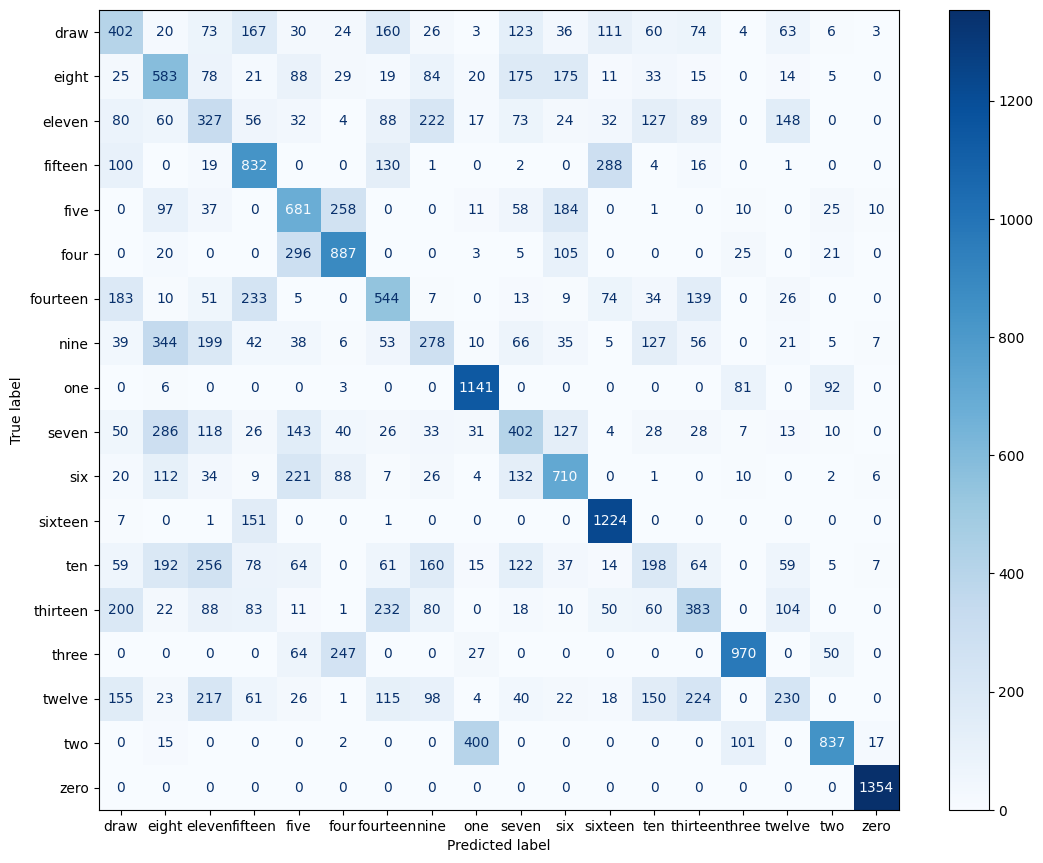

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
display.plot(ax=ax, cmap='Blues')
plt.show()

4.2 SVM RBF Kernel:

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accurary_rbf =  metrics.accuracy_score(y_test, y_pred)
precision_rbf = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_rbf = metrics.recall_score(y_test, y_pred, average='macro')
f1_rbf = metrics.f1_score(y_test, y_pred, average='macro')

t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM RBF',round(accurary_rbf, 3),round(precision_rbf,3),round(recall_rbf, 3),round(f1_rbf,3)])
print(t)

+---------+----------+-----------+--------+-------+
|         | accuracy | precision | recall |   f1  |
+---------+----------+-----------+--------+-------+
| SVM RBF |  0.643   |   0.642   | 0.644  | 0.635 |
+---------+----------+-----------+--------+-------+


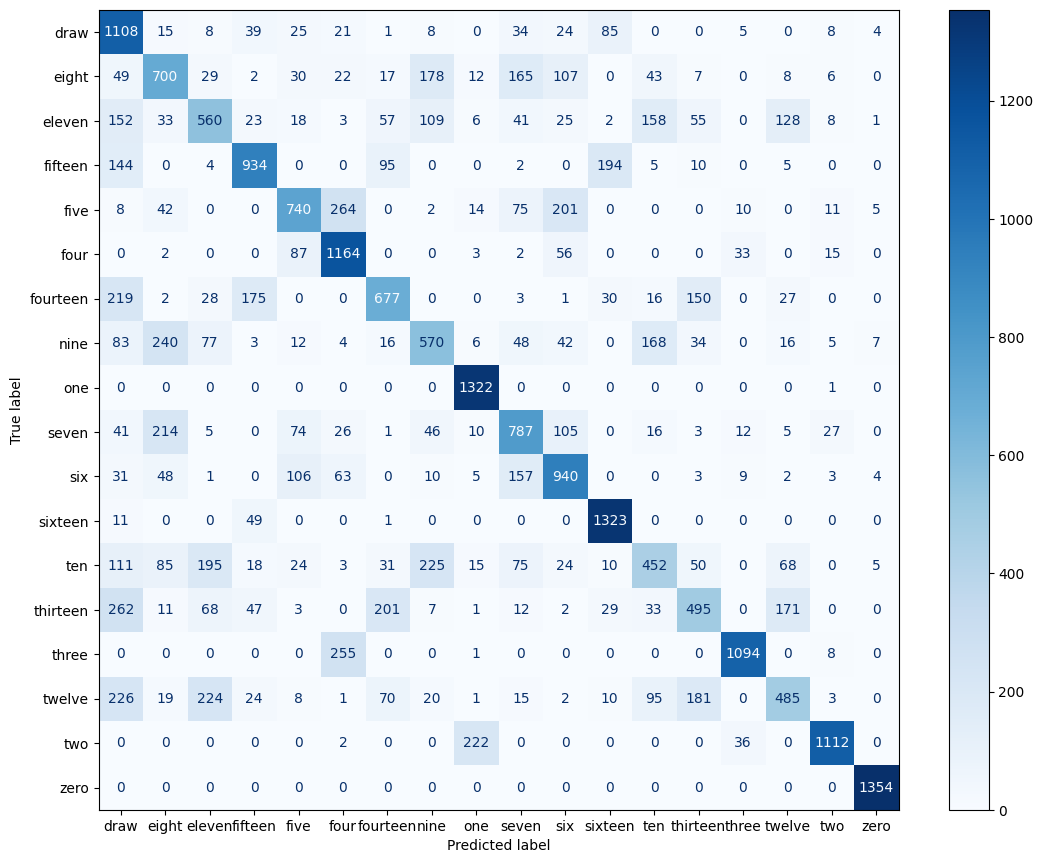

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
display.plot(ax=ax, cmap='Blues')
plt.show()

4.3 SVM Sigmoid Kernel:

In [ ]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accurary_sigmoid =  metrics.accuracy_score(y_test, y_pred)
precision_sigmoid = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_sigmoid = metrics.recall_score(y_test, y_pred, average='macro')
f1_sigmoid = metrics.f1_score(y_test, y_pred, average='macro')

t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM Sigmoid',round(accurary_sigmoid, 3),round(precision_sigmoid,3),round(recall_sigmoid, 3),round(f1_sigmoid,3)])
print(t)

+-------------+----------+-----------+--------+-------+
|             | accuracy | precision | recall |   f1  |
+-------------+----------+-----------+--------+-------+
| SVM Sigmoid |  0.124   |   0.254   | 0.124  | 0.134 |
+-------------+----------+-----------+--------+-------+


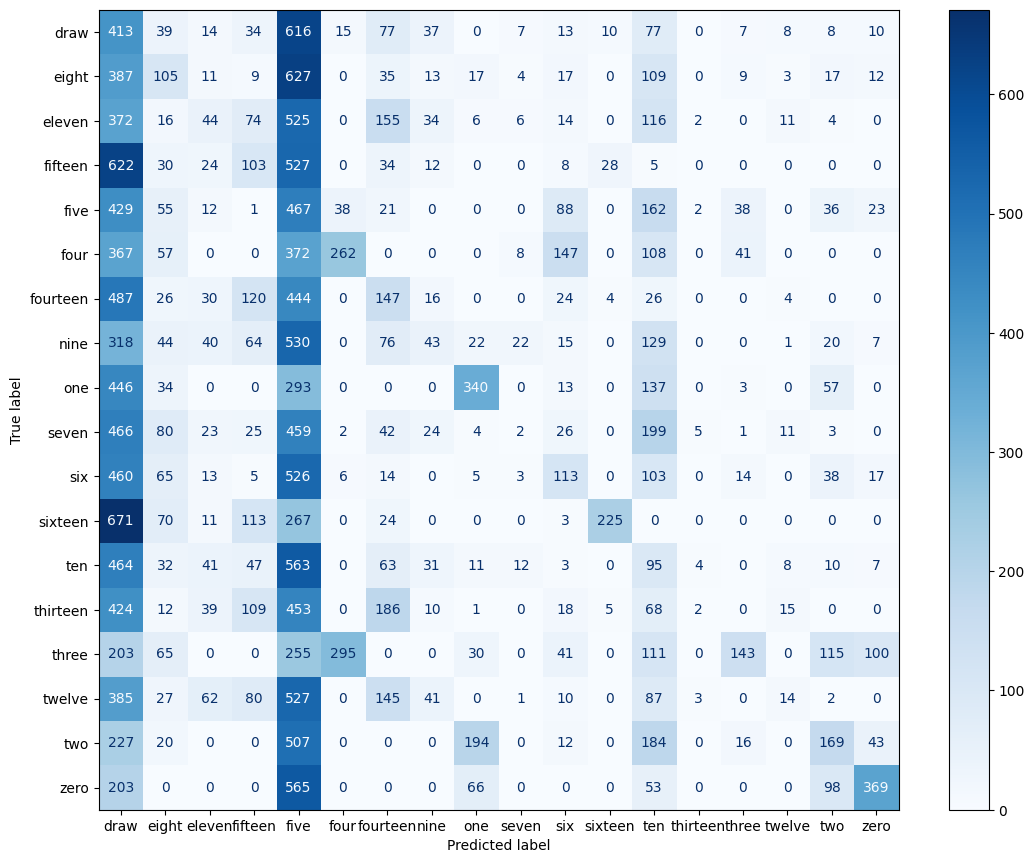

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
display.plot(ax=ax, cmap='Blues')
plt.show()

4.4 SVM Poly Kernel:

In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accurary_poly =  metrics.accuracy_score(y_test, y_pred)
precision_poly = metrics.precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_poly = metrics.recall_score(y_test, y_pred, average='macro')
f1_poly = metrics.f1_score(y_test, y_pred, average='macro')

t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM Poly',round(accurary_poly, 3),round(precision_poly,3),round(recall_poly, 3),round(f1_poly,3)])
print(t)

+----------+----------+-----------+--------+-------+
|          | accuracy | precision | recall |   f1  |
+----------+----------+-----------+--------+-------+
| SVM Poly |   0.62   |   0.621   |  0.62  | 0.609 |
+----------+----------+-----------+--------+-------+


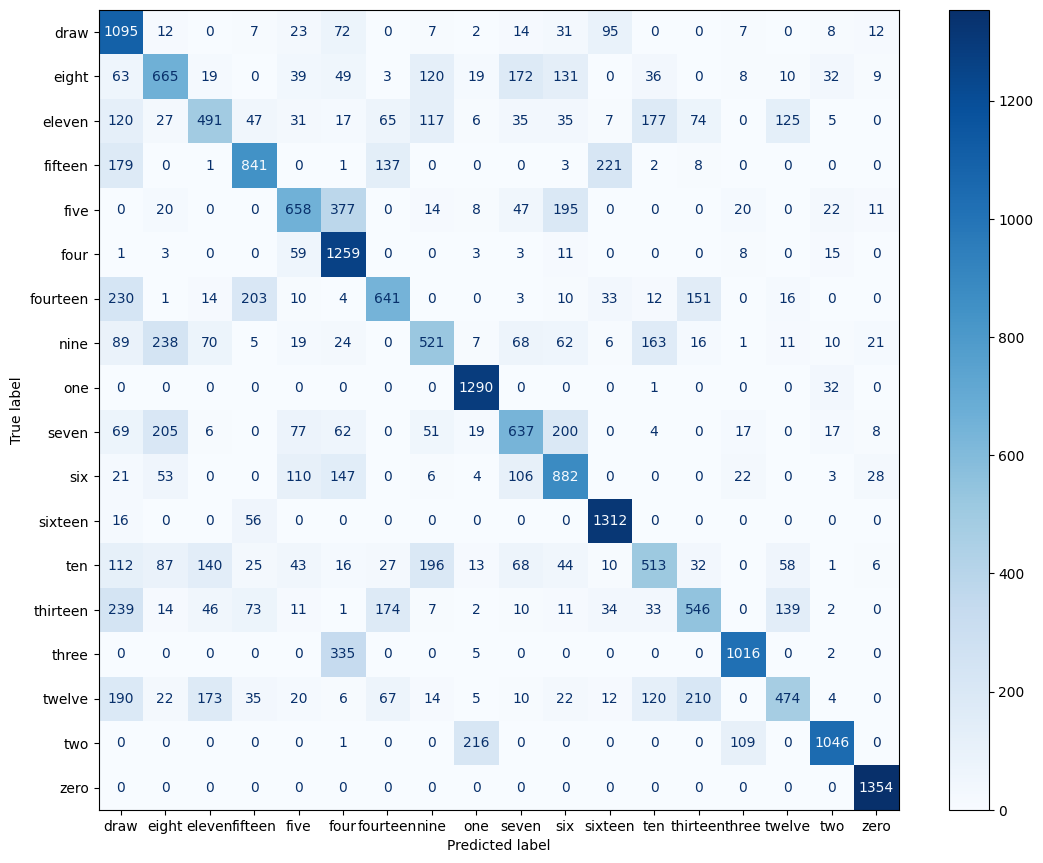

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
display.plot(ax=ax, cmap='Blues')
plt.show()

4.5 So sánh các karnel của SVM:

In [ ]:
t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['SVM Linear',round(accurary_linear, 3),round(precision_linear,3),round(recall_linear, 3),round(f1_linear,3)])
t.add_row(['SVM RBF',round(accurary_rbf, 3),round(precision_rbf,3),round(recall_rbf, 3),round(f1_rbf,3)])
t.add_row(['SVM Sigmoid',round(accurary_sigmoid, 3),round(precision_sigmoid,3),round(recall_sigmoid, 3),round(f1_sigmoid,3)])
t.add_row(['SVM Poly',round(accurary_poly, 3),round(precision_poly,3),round(recall_poly, 3),round(f1_poly,3)])
print(t)

+-------------+----------+-----------+--------+-------+
|             | accuracy | precision | recall |   f1  |
+-------------+----------+-----------+--------+-------+
|  SVM Linear |  0.487   |   0.476   | 0.488  | 0.476 |
|   SVM RBF   |  0.643   |   0.642   | 0.644  | 0.635 |
| SVM Sigmoid |  0.124   |   0.254   | 0.124  | 0.134 |
|   SVM Poly  |   0.62   |   0.621   |  0.62  | 0.609 |
+-------------+----------+-----------+--------+-------+


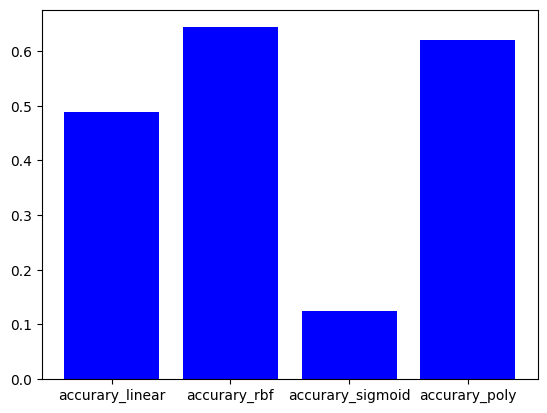

In [ ]:
output= [accurary_linear,accurary_rbf,accurary_sigmoid, accurary_poly]
names = ["accurary_linear", "accurary_rbf", "accurary_sigmoid", "accurary_poly"]
plt.bar(names, output, color="blue")
plt.show() 

5. Thuật toán KNN:

5.1 KNN với with k={1, 3, 5, …, 29}

In [ ]:
k_range = np.arange(1,30,2)
precision = []
recall = []
f1 = []
accs = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train, y_train)
  y_predKNN = KNN.predict(X_test)
  precision.append(metrics.precision_score(y_test, y_predKNN, average='macro', zero_division=0))
  recall.append(metrics.recall_score(y_test, y_predKNN, average='macro'))
  f1.append(metrics.f1_score(y_test, y_predKNN, average='macro'))
  accs.append(metrics.accuracy_score(y_test, y_predKNN))

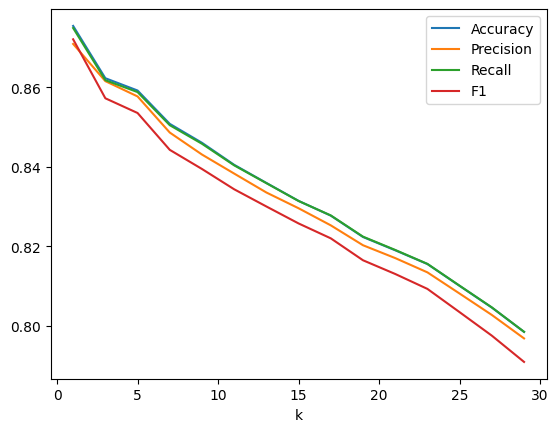

In [ ]:
plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel("k")
plt.legend()

In [ ]:
t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['KNN',round(max(accs), 3),round(max(precision),3),round(max(recall), 3),round(max(f1),3)])
print(t)

+-----+----------+-----------+--------+-------+
|     | accuracy | precision | recall |   f1  |
+-----+----------+-----------+--------+-------+
| KNN |  0.875   |   0.871   | 0.875  | 0.872 |
+-----+----------+-----------+--------+-------+


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)
y_predKNN = KNN.predict(X_test)
precision_k = (metrics.precision_score(y_test, y_predKNN, average='macro', zero_division=0))
recall_k = (metrics.recall_score(y_test, y_predKNN, average='macro'))
f1_k = (metrics.f1_score(y_test, y_predKNN, average='macro'))
accs_k = metrics.accuracy_score(y_test, y_predKNN)

In [ ]:
t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['KNN',round(accs_k, 3),round(precision_k,3),round(recall_k, 3),round(f1_k,3)])
print(t)

+-----+----------+-----------+--------+-------+
|     | accuracy | precision | recall |   f1  |
+-----+----------+-----------+--------+-------+
| KNN |  0.875   |   0.871   | 0.875  | 0.872 |
+-----+----------+-----------+--------+-------+


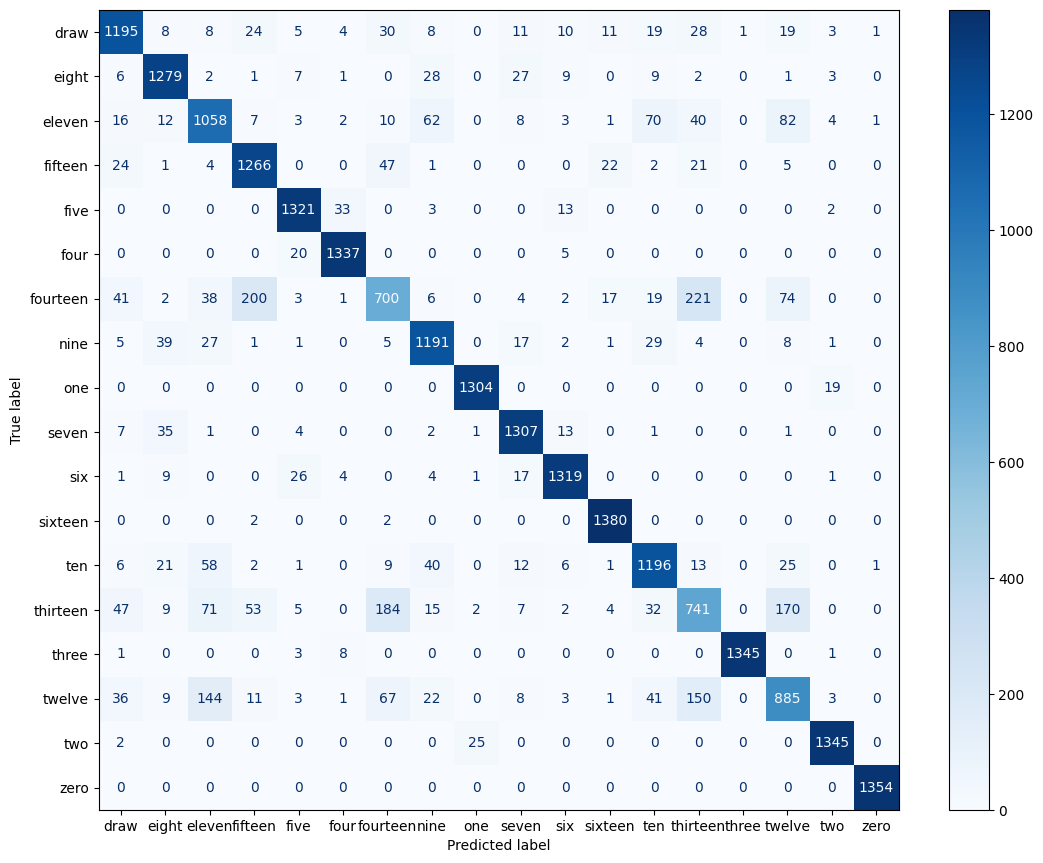

In [ ]:
cm = confusion_matrix(y_test, y_predKNN)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
display.plot(ax=ax, cmap='Blues')
plt.show()

# 6. Neural Network:

Onehot dữ liệu y:

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

num_classes = 18
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
1793/1793 [==============================] - 3s 1ms/step - loss: 1.8095 - accuracy: 0.3838
Epoch 2/50
1793/1793 [==============================] - 2s 1ms/step - loss: 1.3835 - accuracy: 0.5107
Epoch 3/50
1793/1793 [==============================] - 3s 2ms/step - loss: 1.2393 - accuracy: 0.5590
Epoch 4/50
1793/1793 [==============================] - 2s 1ms/step - loss: 1.1456 - accuracy: 0.5869
Epoch 5/50
1793/1793 [==============================] - 2s 1ms/step - loss: 1.0764 - accuracy: 0.6091
Epoch 6/50
1793/1793 [==============================] - 2s 1ms/step - loss: 1.0220 - accuracy: 0.6271
Epoch 7/50
1793/1793 [==============================] - 2s 1ms/step - loss: 0.9788 - accuracy: 0.6424
Epoch 8/50
1793/1793 [==============================] - 3s 1ms/step - loss: 0.9426 - accuracy: 0.6564
Epoch 9/50
1793/1793 [==============================] - 3s 1ms/step - loss: 0.9126 - accuracy: 0.6690
Epoch 10/50
1793/1793 [==============================] - 2s 1ms/step - loss: 0.886

In [ ]:
loss, accuracy_neu = model.evaluate(X_test, y_test)
print(loss)
print(accuracy_neu)

769/769 [==============================] - 3s 3ms/step - loss: 0.6606 - accuracy: 0.7490
0.6606159806251526
0.7490137219429016


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = model.predict(X_test)
precision_neu, recall_neu, fscore_neu, support = precision_recall_fscore_support(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro')

769/769 [==============================] - 1s 1ms/step


In [ ]:
t = PrettyTable(['','accuracy', 'precision', 'recall', 'f1'])
t.add_row(['Neutral Network',accuracy_neu,precision_neu,recall_neu,fscore_neu])
print(t)

+-----------------+--------------------+--------------------+--------------------+--------------------+
|                 |      accuracy      |     precision      |       recall       |         f1         |
+-----------------+--------------------+--------------------+--------------------+--------------------+
| Neutral Network | 0.7490137219429016 | 0.7478325739424165 | 0.7493167230107152 | 0.7457575203794813 |
+-----------------+--------------------+--------------------+--------------------+--------------------+


7. Naïve Bayes:

In [ ]:
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_predNB = nb.predict(X_test)
acc_naive_bayes = metrics.accuracy_score(y_test, y_predNB)
precision_naive_bayes = metrics.precision_score(y_test, y_predNB, average='micro')
recall_naive_bayes = metrics.recall_score(y_test, y_predNB, average='micro')
f1_naive_bayes = metrics.f1_score(y_test, y_predNB, average='micro')

print("* Naive Bayes")
print("Accuracy Score: ",acc_naive_bayes)
print("Precision Score: ",precision_naive_bayes)
print("Recall Score: ",recall_naive_bayes)
print("F1 Score: ",f1_naive_bayes)

* Naive Bayes
Accuracy Score:  0.4427543010534022
Precision Score:  0.4427543010534022
Recall Score:  0.4427543010534022
F1 Score:  0.44275430105340224


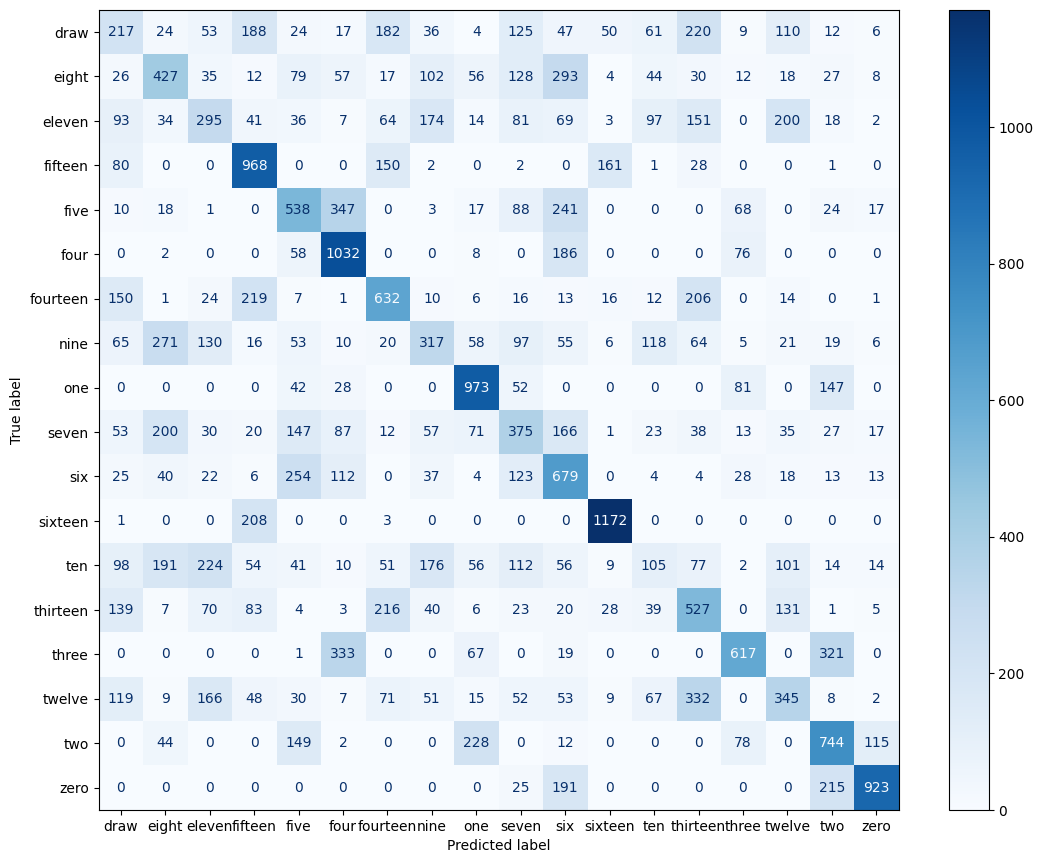

In [ ]:
cm = confusion_matrix(y_test, y_predNB)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
display.plot(ax=ax, cmap='Blues')
plt.show()

8. Radom Forest

In [ ]:
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_predForest = rf.predict(X_test)
acc_random_forest = metrics.accuracy_score(y_test, y_predForest)
precision_random_forest = metrics.precision_score(y_test, y_predForest, average='micro')
recall_random_forest = metrics.recall_score(y_test, y_predForest, average='micro')
f1_random_forest = metrics.f1_score(y_test, y_predForest, average='micro')

print("* Radom Forest")
print("Accuracy Score: ",acc_random_forest)
print("Precision Score: ",precision_random_forest)
print("Recall Score: ",recall_random_forest)
print("F1 Score: ",f1_random_forest)

* Radom Forest
Accuracy Score:  0.8995404075324358
Precision Score:  0.8995404075324358
Recall Score:  0.8995404075324358
F1 Score:  0.8995404075324358


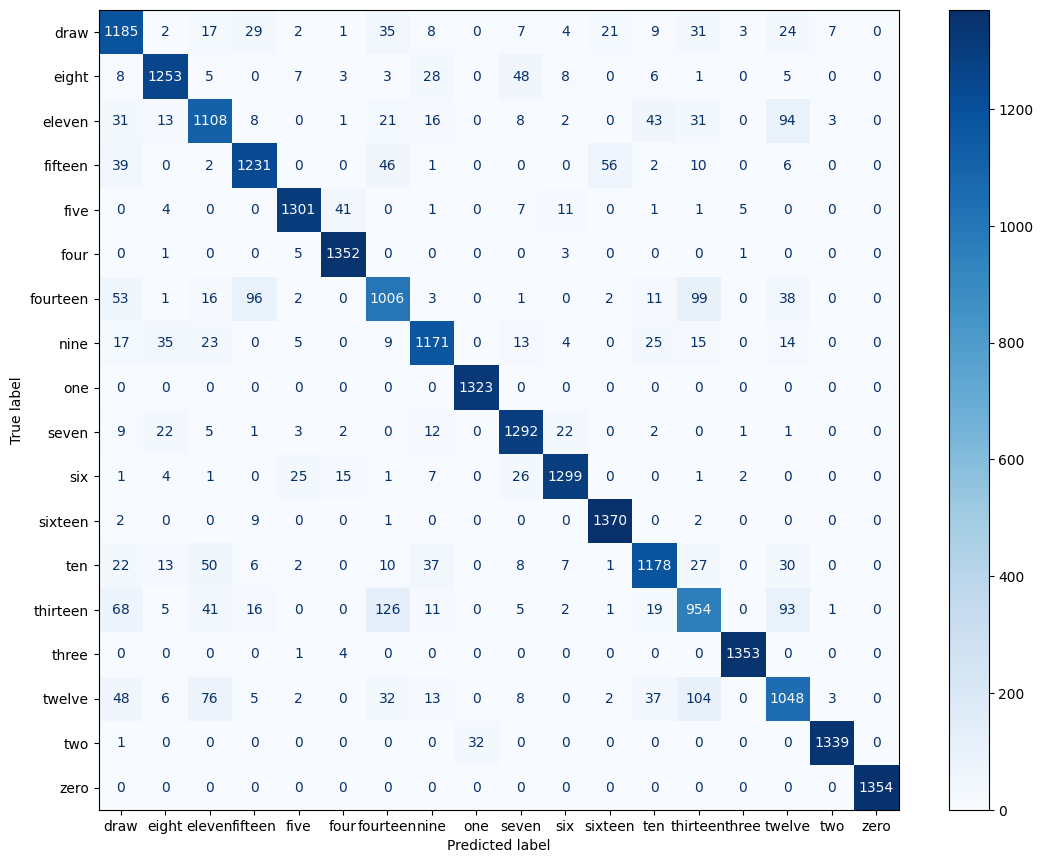

In [ ]:
cm = confusion_matrix(y_test, y_predNB)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
display.plot(ax=ax, cmap='Blues')
plt.show()

9. Decision Tree:

In [ ]:
decision = tree.DecisionTreeClassifier()
decision.fit(X_train, y_train) 
y_predDes = decision.predict(X_test)
acc_decision_tree = metrics.accuracy_score(y_test, y_predDes)
precision_decision_tree = metrics.precision_score(y_test, y_predDes, average='micro')
recall_decision_tree = metrics.recall_score(y_test, y_predDes, average='micro')
f1_decision_tree = metrics.f1_score(y_test, y_predDes, average='micro')

print("* Decision Tree")
print("Accuracy Score: ",acc_decision_tree)
print("Precision Score: ",precision_decision_tree)
print("Recall Score: ",recall_decision_tree)
print("F1 Score: ",f1_decision_tree)

* Decision Tree
Accuracy Score:  0.9267499084882255
Precision Score:  0.9267499084882255
Recall Score:  0.9267499084882255
F1 Score:  0.9267499084882255


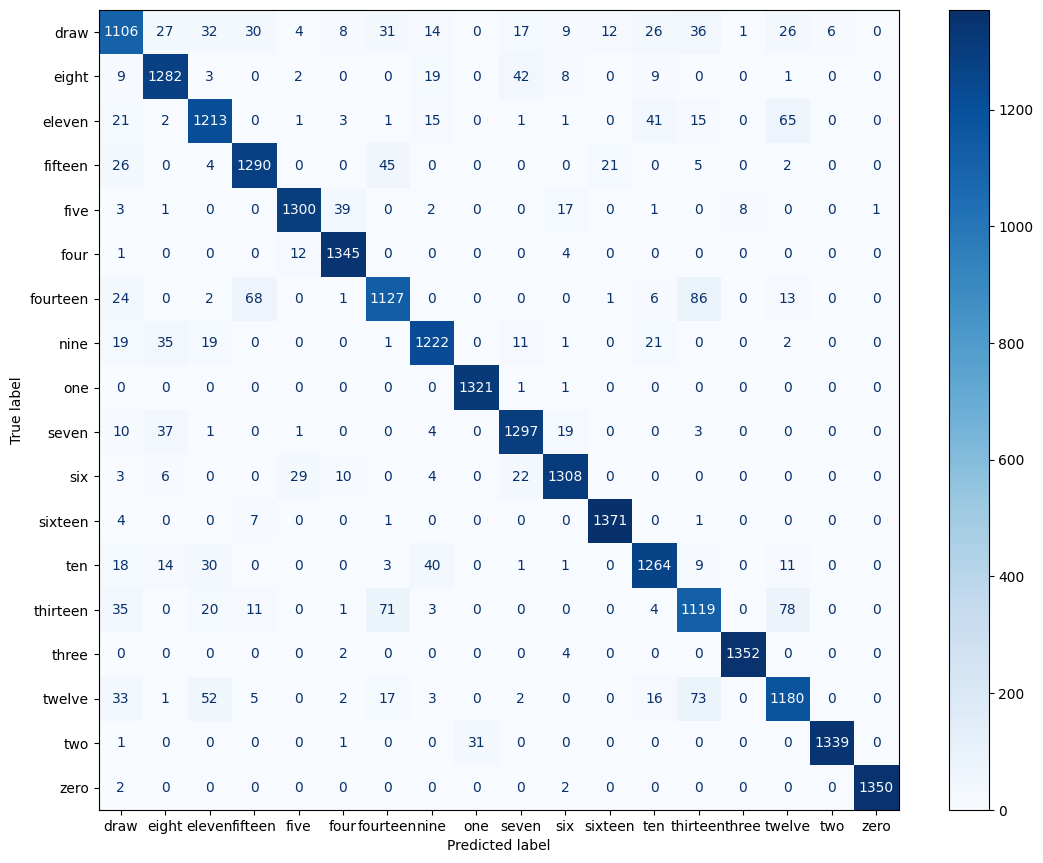

In [ ]:
cm = confusion_matrix(y_test, y_predDes)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
display.plot(ax=ax, cmap='Blues')
plt.show()

10. So sánh các thuật toán:

In [ ]:
t = PrettyTable(['','accuracy','precision','recall','f1'])
t.add_row(['SVM RBF',accurary_rbf,precision_rbf,recall_rbf,f1_rbf])
t.add_row(['KNN',accs_k,precision_k,recall_k,f1_k])
t.add_row(['Neutral Network',accuracy_neu,precision_neu,recall_neu,fscore_neu])
t.add_row(['Naive Baye',acc_naive_bayes,precision_naive_bayes,recall_naive_bayes,f1_naive_bayes])
t.add_row(['Radom Forest',acc_random_forest,precision_random_forest,recall_random_forest,f1_random_forest])
t.add_row(['Decision Tree',acc_decision_tree,precision_decision_tree,recall_decision_tree,f1_decision_tree])
print(t)

+-----------------+--------------------+--------------------+--------------------+---------------------+
|                 |      accuracy      |     precision      |       recall       |          f1         |
+-----------------+--------------------+--------------------+--------------------+---------------------+
|     SVM RBF     | 0.6433074388904706 | 0.6424345796330978 | 0.6437212409080071 |  0.6351674092910269 |
|       KNN       | 0.8753812990604791 | 0.8708535936548738 | 0.8748559006116897 |  0.8720187979258027 |
| Neutral Network | 0.7490137219429016 | 0.7478325739424165 | 0.7493167230107152 |  0.7457575203794813 |
|    Naive Baye   | 0.4427543010534022 | 0.4427543010534022 | 0.4427543010534022 | 0.44275430105340224 |
|   Radom Forest  | 0.8995404075324358 | 0.8995404075324358 | 0.8995404075324358 |  0.8995404075324358 |
|  Decision Tree  | 0.9267499084882255 | 0.9267499084882255 | 0.9267499084882255 |  0.9267499084882255 |
+-----------------+--------------------+---------------

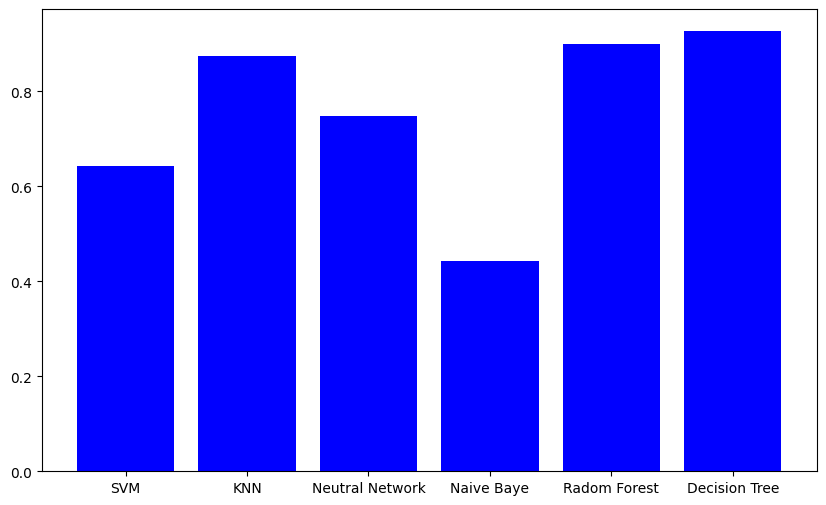

In [ ]:
output= [accurary_rbf,accs_k,accuracy_neu, acc_naive_bayes, acc_random_forest, acc_decision_tree]
names = ["SVM","KNN", "Neutral Network","Naive Baye", "Radom Forest", "Decision Tree"]
fig = plt.figure(figsize=(10, 6))
plt.bar(names, output, color="blue")
plt.show() 